# To Start!

We first import the packages that we will be using. 

We need pandas to work on our data, matplotlib pyplot for visualizations, numpy for array calculations, and finally networkx for all our graph networks.

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Next, we grab the static gtfs rail text files and read them into dataframes.

In [57]:
trips = pd.read_csv('./GTFS_Static/trips.txt')
stops = pd.read_csv('./GTFS_Static/stops.txt')
lines = pd.read_csv('./GTFS_Static/lines.txt')
routes = pd.read_csv('./GTFS_Static/routes.txt')
stop_times = pd.read_csv('./GTFS_Static/stop_times.txt')
stop_time_updates = pd.read_csv('./Delay_Data/stop_time_updates.csv')

/tmp/ipykernel_50142/1675529487.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('./GTFS_Static/trips.txt')
/tmp/ipykernel_50142/1675529487.py:5: DtypeWarning: Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times = pd.read_csv('./GTFS_Static/stop_times.txt')


Let us see what we have. We check which stops are using vehicle type 1 (subway).

In [58]:
routes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,route_fare_class,line_id,listed_route,network_id
0,Red,1,NaN,Red Line,Rapid Transit,1,https://www.mbta.com/schedules/Red,DA291C,FFFFFF,10010,Rapid Transit,line-Red,NaN,rapid_transit
1,Mattapan,1,NaN,Mattapan Trolley,Rapid Transit,0,https://www.mbta.com/schedules/Mattapan,DA291C,FFFFFF,10011,Rapid Transit,line-Mattapan,NaN,m_rapid_transit
2,Orange,1,NaN,Orange Line,Rapid Transit,1,https://www.mbta.com/schedules/Orange,ED8B00,FFFFFF,10020,Rapid Transit,line-Orange,NaN,rapid_transit
3,Green-B,1,B,Green Line B,Rapid Transit,0,https://www.mbta.com/schedules/Green-B,00843D,FFFFFF,10032,Rapid Transit,line-Green,NaN,rapid_transit
4,Green-C,1,C,Green Line C,Rapid Transit,0,https://www.mbta.com/schedules/Green-C,00843D,FFFFFF,10033,Rapid Transit,line-Green,NaN,rapid_transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Shuttle-JFKPark,1,Red Line Shuttle,JFK/UMass - Park Street,Rail Replacement Bus,3,NaN,FFC72C,000000,61997,Free,line-Red,1.0,rail_replacement_bus
217,Shuttle-LynnSwampscott,1,Newburyport/Rockport Line Shuttle,Lynn - Swampscott,Rail Replacement Bus,3,NaN,FFC72C,000000,62053,Free,line-Newburyport,1.0,rail_replacement_bus
218,Shuttle-NorthStationOakGrove,1,Orange Line Shuttle,Oak Grove - North Station,Rail Replacement Bus,3,NaN,FFC72C,000000,62150,Free,line-Orange,1.0,rail_replacement_bus
219,Shuttle-OakGroveReading,1,Haverhill Line Shuttle,Reading - Oak Grove,Rail Replacement Bus,3,NaN,FFC72C,000000,62170,Free,line-Haverhill,1.0,rail_replacement_bus


In [59]:
stops[stops["vehicle_type"] == 1]

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
7236,70061,70061.0,Alewife,Alewife - Red Line,NaN,Red Line,42.396158,-71.139971,RapidTransit,NaN,https://www.mbta.com/stops/place-alfcl,level_-2_platform,0,place-alfcl,1,Cambridge,NaN,NaN,1.0
7238,Alewife-01,NaN,Alewife,Alewife - Red Line - Track 1,1,Track 1,42.396158,-71.139971,RapidTransit,NaN,https://www.mbta.com/stops/place-alfcl,level_-2_platform,0,place-alfcl,1,Cambridge,NaN,NaN,1.0
7239,Alewife-02,NaN,Alewife,Alewife - Red Line - Track 2,2,Track 2,42.396158,-71.139971,RapidTransit,NaN,https://www.mbta.com/stops/place-alfcl,level_-2_platform,0,place-alfcl,1,Cambridge,NaN,NaN,1.0
7258,70083,70083.0,Andrew,Andrew - Red Line - Ashmont/Braintree,1,Ashmont/Braintree,42.330154,-71.057655,RapidTransit,NaN,https://www.mbta.com/stops/place-andrw,level_-2_platform,0,place-andrw,1,Boston,NaN,NaN,1.0
7259,70084,70084.0,Andrew,Andrew - Red Line - Alewife,2,Alewife,42.330154,-71.057655,RapidTransit,NaN,https://www.mbta.com/stops/place-andrw,level_-2_platform,0,place-andrw,1,Boston,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,70050,70050.0,Wood Island,Wood Island - Blue Line - Wonderland,2,Wonderland,42.379671,-71.022783,RapidTransit,NaN,https://www.mbta.com/stops/place-wimnl,level_0_platform,0,place-wimnl,1,Boston,NaN,NaN,1.0
9577,70099,70099.0,Wollaston,Wollaston - Red Line - Braintree,NaN,Braintree,42.266762,-71.020542,RapidTransit,NaN,https://www.mbta.com/stops/place-wlsta,level_1_platform,0,place-wlsta,1,Quincy,NaN,NaN,1.0
9578,70100,70100.0,Wollaston,Wollaston - Red Line - Alewife,NaN,Alewife,42.266788,-71.020457,RapidTransit,NaN,https://www.mbta.com/stops/place-wlsta,level_1_platform,0,place-wlsta,1,Quincy,NaN,NaN,1.0
9619,70059,70059.0,Wonderland,Wonderland - Blue Line - Bowdoin,1,Bowdoin,42.413514,-70.991714,RapidTransit,NaN,https://www.mbta.com/stops/place-wondl,level_0_platform,0,place-wondl,1,Revere,NaN,NaN,1.0


Ok so now we only have the semi-metro and the subway lines.

In [60]:
stop_time_updates[stop_time_updates['stop_id'] == "70095"]

,trip_id,stop_id,arrival,departure
2777,ADDED-1581696955,70095,82518.0,NaN
2801,59095849,70095,84.0,NaN
4415,59095848,70095,85423.0,NaN
5882,59095847,70095,84218.0,NaN
8890,ADDED-1581696971,70095,82932.0,NaN
9607,59095850,70095,1224.0,NaN


In [61]:
# late count

stop_time_updates.groupby("stop_id").count()

,trip_id,arrival,departure
stop_id,,,
1,18,12,12
10,4,4,4
10000,4,2,2
10003,11,5,5
10005,7,7,7
...,...,...,...
WML-0340-01,1,1,1
WML-0364-01,1,1,1
WML-0442-CS,1,1,0


# Cleaning the Data

Ok, so we really need to clean this data up. We remove all stops that are not part of the boston mbta rail lines (ie fake stop data) and we only want the main stop for each station.

In [62]:
# desired vehicle types 0 and 1
my_list = [0,1]

mbta_stops = stops.loc[stops["vehicle_type"].isin(my_list)]

mbta_stops.groupby("vehicle_type").count()

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street
vehicle_type,,,,,,,,,,,,,,,,,,
0.0,163,159,163,163,6,163,163,163,163,0,163,163,163,163,163,163,0,0
1.0,114,106,114,114,30,114,114,114,114,0,114,114,114,114,114,114,0,0


We can look at our data now!

In [63]:
mbta_stops = mbta_stops.sort_values("stop_id")
mbta_stops

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
7468,170136,170136.0,Babcock Street,Babcock Street - Green Line - Park Street & North,NaN,Park Street & North,42.351538,-71.119553,RapidTransit,NaN,https://www.mbta.com/stops/place-babck,level_median,0,place-babck,1,Boston,NaN,NaN,0.0
7469,170137,170137.0,Babcock Street,Babcock Street - Green Line - (B) Boston College,NaN,Boston College,42.351695,-71.120257,RapidTransit,NaN,https://www.mbta.com/stops/place-babck,level_median,0,place-babck,1,Boston,NaN,NaN,0.0
7250,170140,170140.0,Amory Street,Amory Street - Green Line - Park Street & North,NaN,Park Street & North,42.350901,-71.114318,RapidTransit,NaN,https://www.mbta.com/stops/place-amory,level_median,0,place-amory,1,Boston,NaN,NaN,0.0
7251,170141,170141.0,Amory Street,Amory Street - Green Line - (B) Boston College,NaN,Boston College,42.351066,-71.115027,RapidTransit,NaN,https://www.mbta.com/stops/place-amory,level_median,0,place-amory,1,Boston,NaN,NaN,0.0
8095,70001,70001.0,Forest Hills,Forest Hills - Orange Line,NaN,Orange Line,42.300926,-71.114129,RapidTransit,NaN,https://www.mbta.com/stops/place-forhl,level_-1_orange_platform,0,place-forhl,1,Boston,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,Government Center-Brattle,NaN,Government Center,Government Center - Green Line - Loop Platform,NaN,Loop Platform,42.359705,-71.059215,RapidTransit,NaN,https://www.mbta.com/stops/place-gover,level_-1_green_platform,0,place-gover,1,Boston,NaN,NaN,0.0
8717,Oak Grove-01,NaN,Oak Grove,Oak Grove - Orange Line - Track 1,1,Track 1,42.437735,-71.070837,RapidTransit,NaN,https://www.mbta.com/stops/place-ogmnl,level_0_platform,0,place-ogmnl,1,Malden,NaN,NaN,1.0
8718,Oak Grove-02,NaN,Oak Grove,Oak Grove - Orange Line - Track 2,2,Track 2,42.437727,-71.070905,RapidTransit,NaN,https://www.mbta.com/stops/place-ogmnl,level_0_platform,0,place-ogmnl,1,Malden,NaN,NaN,1.0
9493,Union Square-01,NaN,Union Square,Union Square - Green Line - Track 1,1,Track 1,42.377024,-71.093964,RapidTransit,NaN,https://www.mbta.com/stops/place-unsqu,level_ground,0,place-unsqu,1,Somerville,NaN,NaN,0.0


So stop_id is string means that it is a random repeat, lets remove them


In [64]:
# test below
mbta_stops[mbta_stops["stop_name"] == "Park Street"]

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
8786,70075,70075.0,Park Street,Park Street - Red Line - Ashmont/Braintree,NaN,Ashmont/Braintree,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-2_red_platform,0,place-pktrm,1,Boston,NaN,NaN,1.0
8787,70076,70076.0,Park Street,Park Street - Red Line - Alewife,NaN,Alewife,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-2_red_platform,0,place-pktrm,1,Boston,NaN,NaN,1.0
8788,70196,70196.0,Park Street,Park Street - Green Line - (B) Boston College,B,Boston College,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-1_green_platform,0,place-pktrm,1,Boston,NaN,NaN,0.0
8789,70197,70197.0,Park Street,Park Street - Green Line - (C) Cleveland Circle,C,Cleveland Circle,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-1_green_platform,0,place-pktrm,1,Boston,NaN,NaN,0.0
8790,70198,70198.0,Park Street,Park Street - Green Line - (D) Riverside,D,Riverside,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-1_green_platform,0,place-pktrm,1,Boston,NaN,NaN,0.0
8791,70199,70199.0,Park Street,Park Street - Green Line - (E) Heath Street,E,Heath Street,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-1_green_platform,0,place-pktrm,1,Boston,NaN,NaN,0.0
8792,70200,70200.0,Park Street,Park Street - Green Line - Government Center &...,NaN,Government Center & North,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-1_green_platform,0,place-pktrm,1,Boston,NaN,NaN,0.0
8793,71199,NaN,Park Street,Park Street - Green Line - Drop-off Only,NaN,Drop-off Only,42.356395,-71.062424,RapidTransit,NaN,https://www.mbta.com/stops/place-pktrm,level_-1_green_platform,0,place-pktrm,1,Boston,NaN,NaN,0.0


In [65]:
mbta_stops[mbta_stops["stop_name"] == "Union Square"]["stop_id"]

9491              70503
9492              70504
9493    Union Square-01
9494    Union Square-02
Name: stop_id, dtype: object

In [66]:
type(mbta_stops[mbta_stops["stop_name"] == "Union Square"]["stop_id"])

pandas.core.series.Series

# Creating the Graph (NOT DONE YET)

Now we can use networkx package to create graph objects. We will be using the graph object to create calculations. We will create a simple graph for now.

First, we make simple function to turn lists of strings into int.

In [67]:
def to_int(l):
    """
    Simple function that takes in a list of strings and returns a string of integers
    """
    return [int(i) for i in l]

## WIP FOR BOSTON

https://www.mbta.com/schedules/subway

We only want lines Red, Mattapan, Orange, Blue, Green BCDE

In [68]:
# mark

In [69]:
# rueben

In [70]:
# willie

In [71]:
# bowen

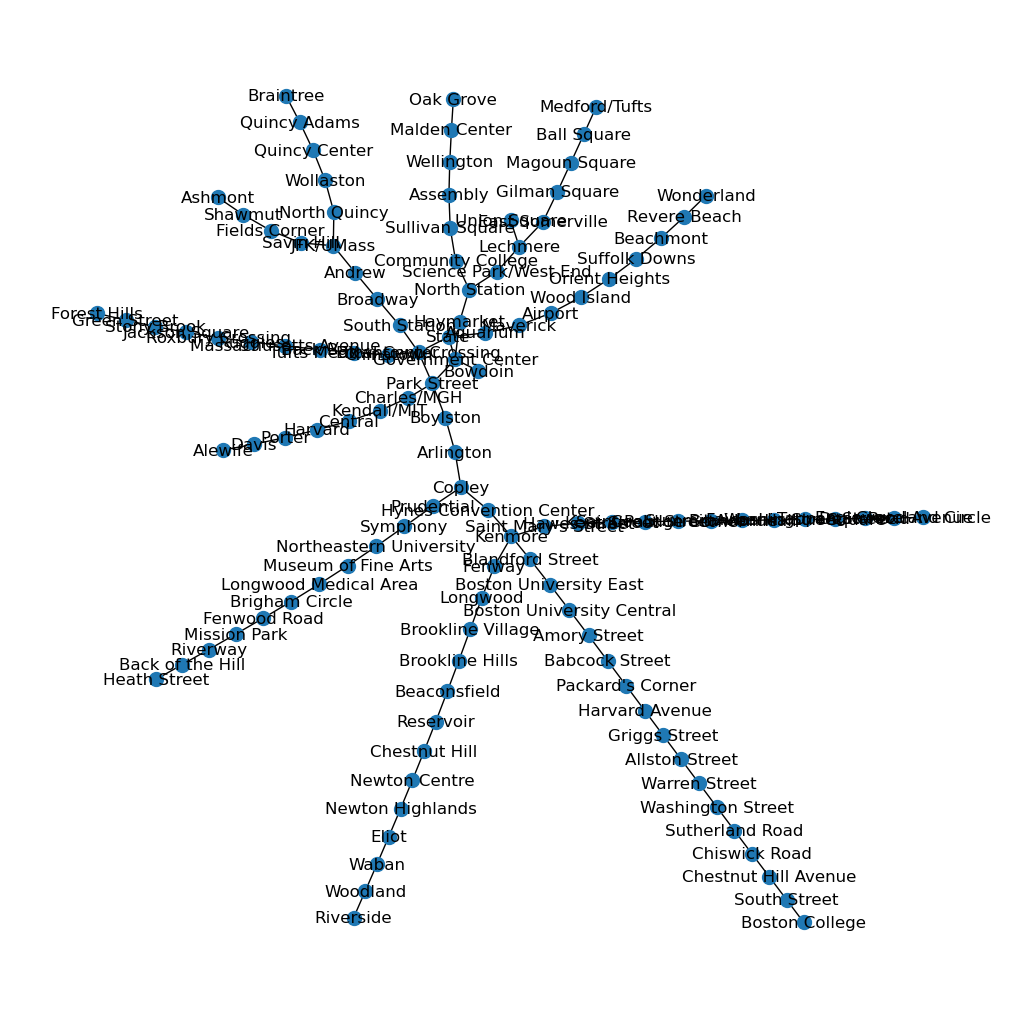

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

def open_line_file(filename):
    with open(f'./Rapid_Transit_Lines/{filename}.txt', 'r') as f:
      lines_r = f.readlines()
    return lines_r

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

for line in line_stations:
    for i in range(len(line)-1):
        station_i = line[i].replace('\n', '')
        station_ip1 = line[i+1].replace('\n', '')
        stations.add(station_i)
        edges.add((station_i, station_ip1))
    station_n1 = line[-1].replace('\n', '')
    stations.add(station_n1)

network = nx.Graph()
network.add_nodes_from(stations)
network.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
nx.draw_kamada_kawai(network, with_labels=True, node_size=100)

# Visualization Time!

Let's see what our graph looks like.

In [73]:
'''
I try to draw each line by itself, but it isnt really working... WIP i guess


fig = plt.figure(figsize = (10,10))

for i in range(7):
    plt.subplot(7,1,i+1)
    nodes = [j for j in NL if str(j)[0:3] == f"80{i+1}"]
    print(nodes)
    nx.draw_kamada_kawai(train_network, nodelist = nodes, with_labels=True, node_size=100)
    plt.xlabel(f"Line {i+1}")

plt.show()
'''

'\nI try to draw each line by itself, but it isnt really working... WIP i guess\n\n\nfig = plt.figure(figsize = (10,10))\n\nfor i in range(7):\n    plt.subplot(7,1,i+1)\n    nodes = [j for j in NL if str(j)[0:3] == f"80{i+1}"]\n    print(nodes)\n    nx.draw_kamada_kawai(train_network, nodelist = nodes, with_labels=True, node_size=100)\n    plt.xlabel(f"Line {i+1}")\n\nplt.show()\n'

In [74]:
list(network)

['Chiswick Road',
 'Beaconsfield',
 'Community College',
 'Amory Street',
 'South Street',
 'Medford/Tufts',
 'Gilman Square',
 'Boylston',
 'Wollaston',
 'South Station',
 'Coolidge Corner',
 'Englewood Avenue',
 'Oak Grove',
 'Washington Square',
 'Braintree',
 'Sullivan Square',
 'Summit Avenue',
 'Revere Beach',
 'Ashmont',
 'Brandon Hall',
 'Babcock Street',
 'Boston College',
 'Mission Park',
 'North Quincy',
 'Magoun Square',
 'Woodland',
 'Savin Hill',
 'Bowdoin',
 'Central',
 'Sutherland Road',
 'Washington Street',
 'Newton Highlands',
 'Northeastern University',
 'Blandford Street',
 'Back Bay',
 'Waban',
 'Copley',
 'Quincy Center',
 'Government Center',
 'Longwood Medical Area',
 'Jackson Square',
 'Assembly',
 'Maverick',
 'Massachusetts Avenue',
 'Science Park/West End',
 'Wellington',
 'Roxbury Crossing',
 'Back of the Hill',
 'Newton Centre',
 'Beachmont',
 'Harvard',
 'Saint Paul Street',
 'Ruggles',
 'Fenwood Road',
 'Aquarium',
 'Park Street',
 'Hawes Street',
 'Ken

# Analysis of Simple Graph

We can proceed to do some simple mathematical analysis such as centrality and modularity on our graph. 

We use Katz centrality in this case:

In [75]:
nx.katz_centrality(network, max_iter = 1000)

{'Chiswick Road': 0.09123180190837762,
 'Beaconsfield': 0.0912415042898425,
 'Community College': 0.09234614797449285,
 'Amory Street': 0.09124329310118755,
 'South Street': 0.09031017413683155,
 'Medford/Tufts': 0.08202415078829287,
 'Gilman Square': 0.09131935218935469,
 'Boylston': 0.09370996875578602,
 'Wollaston': 0.09132783822932415,
 'South Station': 0.09362964022415202,
 'Coolidge Corner': 0.0912415042898425,
 'Englewood Avenue': 0.09031017413683155,
 'Oak Grove': 0.08202407287551715,
 'Washington Square': 0.09124034415299136,
 'Braintree': 0.08202415943066935,
 'Sullivan Square': 0.09135195451809495,
 'Summit Avenue': 0.09124132288752823,
 'Revere Beach': 0.09031017434851138,
 'Ashmont': 0.08202503135448416,
 'Brandon Hall': 0.09124129604798575,
 'Babcock Street': 0.09124150437743415,
 'Boston College': 0.08202406160539107,
 'Mission Park': 0.09123180199596927,
 'North Quincy': 0.09219102330954534,
 'Magoun Square': 0.09115608472693035,
 'Woodland': 0.09031017413683155,
 'Savi

# Ok we chug along

Let just do this algorithm 

In [76]:
NL = list(network)
NL

['Chiswick Road',
 'Beaconsfield',
 'Community College',
 'Amory Street',
 'South Street',
 'Medford/Tufts',
 'Gilman Square',
 'Boylston',
 'Wollaston',
 'South Station',
 'Coolidge Corner',
 'Englewood Avenue',
 'Oak Grove',
 'Washington Square',
 'Braintree',
 'Sullivan Square',
 'Summit Avenue',
 'Revere Beach',
 'Ashmont',
 'Brandon Hall',
 'Babcock Street',
 'Boston College',
 'Mission Park',
 'North Quincy',
 'Magoun Square',
 'Woodland',
 'Savin Hill',
 'Bowdoin',
 'Central',
 'Sutherland Road',
 'Washington Street',
 'Newton Highlands',
 'Northeastern University',
 'Blandford Street',
 'Back Bay',
 'Waban',
 'Copley',
 'Quincy Center',
 'Government Center',
 'Longwood Medical Area',
 'Jackson Square',
 'Assembly',
 'Maverick',
 'Massachusetts Avenue',
 'Science Park/West End',
 'Wellington',
 'Roxbury Crossing',
 'Back of the Hill',
 'Newton Centre',
 'Beachmont',
 'Harvard',
 'Saint Paul Street',
 'Ruggles',
 'Fenwood Road',
 'Aquarium',
 'Park Street',
 'Hawes Street',
 'Ken

In [77]:
def station_id_to_index(station_id_list):
    """
    Will get a list of the indices of your stations in the node list
    :param station_id_list: the stop id of your stations
    :return: the list of the indices correlated with the stop id in node list
    """
    NL_indices = []
    
    for id in station_id_list:
        NL_indices.append((id, NL.index(id)))
    
    return NL_indices

In [78]:
def index_to_station_id(index_list):
    """
    Will get a list of the station id of your index in the node list
    :param index_list: the list of indices
    :return: the list of station id's correlated to node list
    """
    station_list = []
    
    for i in index_list:
        station_list.append(NL[i])
        
    return station_list

In [79]:
def rlp(f, adjacency, epsilon, max_l = 3):
    """
    Implementing the RLP algorithm into python
    :param f: 1xN vector, components corresponding to target nodes are 1 and 0 otherwise
    :param adjacency: NxN adjacecny matrix of our network
    :param epsilon: tunable parameter controlling weight of the paths with different lengths
    :param max_l: furthest nodes we consider
    :return: 1xN vector that ranks the importance of nodes on our network
    """
    s_rlp = np.zeros(len(f))
    
    for l in range(0, max_l):
        summation_iteration = np.power(epsilon, l)*f@np.linalg.matrix_power(adjacency, l+1)
        s_rlp = np.add(s_rlp, summation_iteration)
        
    return s_rlp

In [80]:
def get_ranked_stations(array):
    """
    Take the ranking and convert the numbers to stations
    :param array: the calculated stations
    :return: the station's that are important
    """
    
    def merge(list1, list2):
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
        return merged_list
    
    indices = list(np.nonzero(array)[1])
    
    values = []
    for i in indices:
        values.append(array[0][i])
    
    stations = index_to_station_id(indices)
    
    # Create list of tuples (station, value of station)
    merged = merge(stations, values)
    # Sort on values
    merged.sort(key = lambda x: x[1])
    
    # Grab first element of each tuple
    station_sorted = (list(zip(*merged))[0])
    
    return station_sorted

In [81]:
# Concert/Stadium cluster of nodes (Crypto arena, stadiums near USC, dodger stadium)
print(f"TD Garden - North Station, index {NL.index('North Station')}")
print(f"Big Night Live - North Station, index {NL.index('North Station')}")
print(f"Fenway Park - Kenmore, index {NL.index('Kenmore')}")
print(f"Harvard Stadium - Harvard Ave, index {NL.index('Harvard')}")

Destination_station_ids = ['North Station', 'Kenmore', 'Harvard']

TD Garden - North Station, index 109
Big Night Live - North Station, index 109
Fenway Park - Kenmore, index 103
Harvard Stadium - Harvard Ave, index 50


In [82]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.9


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

('Bowdoin',
 'Assembly',
 'Aquarium',
 'Park Street',
 'Kent Street',
 'Brookline Village',
 'Charles/MGH',
 'East Somerville',
 'Arlington',
 'Boston University Central',
 'Downtown Crossing',
 'Prudential',
 'Alewife',
 'Union Square',
 'Sullivan Square',
 'Copley',
 'Hawes Street',
 'Davis',
 'Boston University East',
 'Kendall/MIT',
 'Longwood',
 'Lechmere',
 'Government Center',
 'State',
 'Harvard',
 'North Station',
 'Central',
 'Porter',
 'Kenmore',
 'Community College',
 'Science Park/West End',
 'Blandford Street',
 'Haymarket',
 "Saint Mary's Street",
 'Fenway',
 'Hynes Convention Center')

In [83]:
np.unique(rlp(f, A_stadium, epsilon, 3))

array([0.  , 0.81, 0.9 , 1.71, 1.8 , 2.7 , 3.43, 3.6 , 4.24, 5.05])

In [84]:
NL.index('Arlington')

77

In [85]:
rlp(f, A_stadium, epsilon, 3)[0][1]

0.0